In [14]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

file_path = 'diabetes_scale.txt'
X, y = load_svmlight_file(file_path)
X = X.toarray()  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Training set: (614, 8)
Testing set: (154, 8)


In [16]:

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

perceptron.fit(X_train, y_train)

print(f"Model weight: {perceptron.coef_}")
print(f"Model bias: {perceptron.intercept_}")

Model weight: [[-2.1764355  -2.989915    1.5573794  -1.545466    0.5034727  -5.34275715
  -2.2297508  -1.7000163 ]]
Model bias: [-1.]


In [10]:

y_pred = perceptron.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.71
Recall: 0.96
F1 Score: 0.82


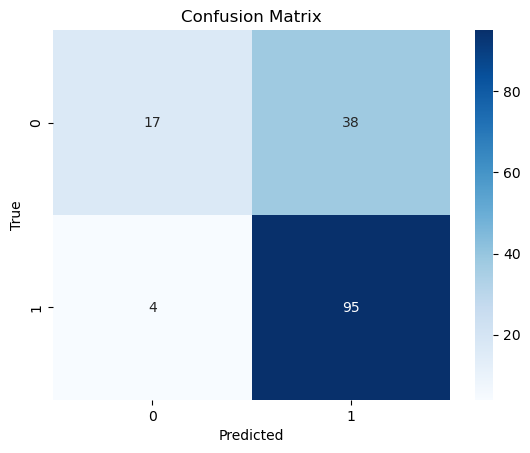

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

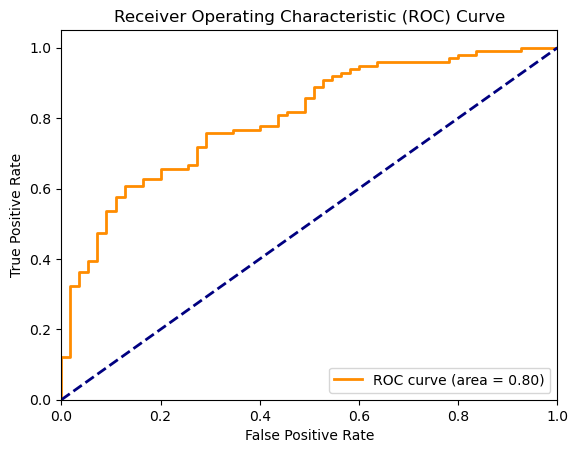

In [19]:
# 计算并绘制 ROC 曲线和 AUC
from sklearn.metrics import roc_curve, auc

# 计算决策函数分数
y_score = perceptron.decision_function(X_test)

# 计算 ROC 曲线的 TPR 和 FPR
fpr, tpr, _ = roc_curve(y_test, y_score)

# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()